#  dependencies

In [93]:
import os
from pathlib import Path
import json
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt
import pywt

# data loading

In [94]:
train_file= os.path.join('/kaggle/input/sprsound-nosplit/SPRSound-main/record')
label_file=os.path.join('/kaggle/input/sprsound-nosplit/SPRSound-main/labels')

In [95]:
event_level=[]
file_name=[]
files=os.listdir(label_file)
records=pd.DataFrame(columns=['Path','record_annotation'])
events=pd.DataFrame(columns=['Path','start','end','type'])
for i in files:
    labels=json.load(open(os.path.join(label_file,i)))
    file_name={'Path':Path(i).stem+'.wav'}
    labels.update(file_name) 
    records.loc[len(records.index)]=labels
    event_level=labels['event_annotation']
    if len(event_level)==0:
        file_name.update({'type':'Poor Quality'})
        events.loc[len(events.index)]=file_name
    for x in range(0,len(event_level)):
        event_level[x].update(file_name)
        events.loc[len(events.index)]=event_level[x]

In [77]:
events[events['type']=='Normal']

,Path,start,end,type
0,66327579_5.9_1_p3_6380.wav,324,2291,Normal
1,66327579_5.9_1_p3_6380.wav,2344,4259,Normal
2,66327579_5.9_1_p3_6380.wav,4304,6908,Normal
6,40970076_5.6_1_p3_3486.wav,2133,5512,Normal
7,41249093_4.2_1_p3_3853.wav,4377,6119,Normal
...,...,...,...,...
12435,41267024_0.3_0_p2_2730.wav,1461,2870,Normal
12436,41267024_0.3_0_p2_2730.wav,8051,9523,Normal
12438,41267024_0.3_0_p2_2730.wav,5296,6274,Normal
12439,00014365_4.3_1_p4_7545.wav,5562,7139,Normal


In [78]:
events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12443 entries, 0 to 12442
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Path    12443 non-null  object
 1   start   12213 non-null  object
 2   end     12213 non-null  object
 3   type    12443 non-null  object
dtypes: object(4)
memory usage: 486.1+ KB


In [81]:
event_distribution=events['type'].value_counts(normalize=True)*100

type
Normal            75.102467
Fine Crackle      11.862091
Wheeze             8.510809
Poor Quality       1.848429
Rhonchi            1.189424
Coarse Crackle     0.803665
Stridor            0.393796
Wheeze+Crackle     0.289319
Name: proportion, dtype: float64

In [84]:
record_distribution=records['record_annotation'].value_counts(normalize=True)*100

record_annotation
Normal          65.391109
DAS             13.505909
CAS             10.354530
Poor Quality     6.471581
CAS & DAS        4.276871
Name: proportion, dtype: float64

<Axes: ylabel='type'>

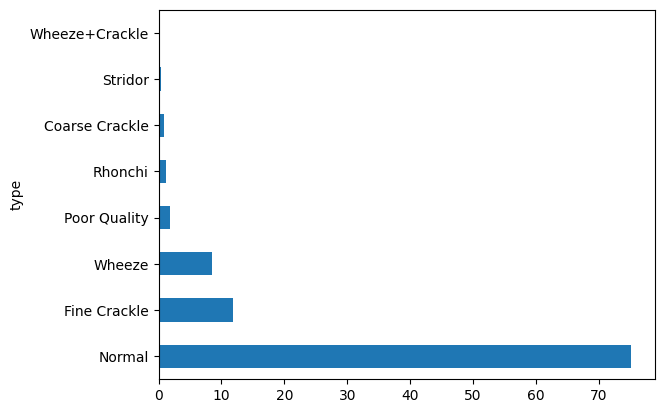

In [85]:
event_distribution.plot(kind='barh')

<Axes: ylabel='record_annotation'>

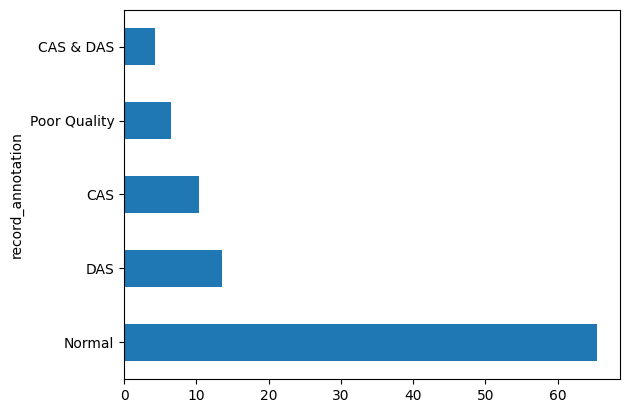

In [86]:
record_distribution.plot(kind='barh')

In [ ]:
event_encode={"Normal":0,"Fine Crackle":1,"Wheeze":1,"Coarse Crackle":1,"Rhonchi":1,"Wheeze+Crackle":1,"Stridor":1,"Poor Quality":2}
encoded_event=events.replace({"type":event_encode})
record_encode={"Normal":0,"DAS":1,"CAS":1,"CAS & DAS":1,"Poor Quality":2}
encoded_record=records.replace({"record_annotation":record_encode})

record_annotation
0    2324
1    1000
2     230
Name: count, dtype: int64

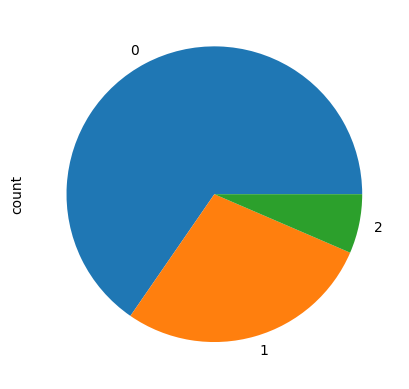

In [88]:
encoded_record['record_annotation'].value_counts().plot(kind="pie")
encoded_record['record_annotation'].value_counts()

type
0    9345
1    2868
2     230
Name: count, dtype: int64

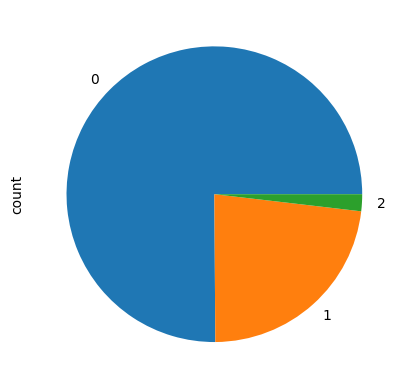

In [89]:
encoded_event['type'].value_counts().plot(kind="pie")
encoded_event['type'].value_counts()

In [ ]:
demop,demos,demoe,demot=events.loc[1]
audio=tfio.audio.AudioIOTensor(os.path.join(train_file,demop))

In [ ]:
audio_slice=audio[100:]
audio_tensor=tf.squeeze(audio_slice,axis=[-1])
audio_tensor

In [ ]:
def load_sound(filename):
    data, samplerate = sf.read(train_file) 
    sf.write('16bit.wav', data, samplerate, subtype='PCM_16')
    file=tf.io.read_file('16bit.wav')
    wav,sample_rate=tf.audio.decode_wav(file,1)
    

In [ ]:
import soundfile as sf

# Read the 32-bit WAV file
data, samplerate = sf.read('/kaggle/input/spr-sound/SPRSound-main/train_wav/41091988_3.1_1_p3_583.wav')

# Write the data to a 16-bitt WAV file
sf.write('16bit.wav', data, samplerate, subtype='PCM_16')


# plotting

STFT hop length duration is: 0.256s
STFT window duration is: 1.024s


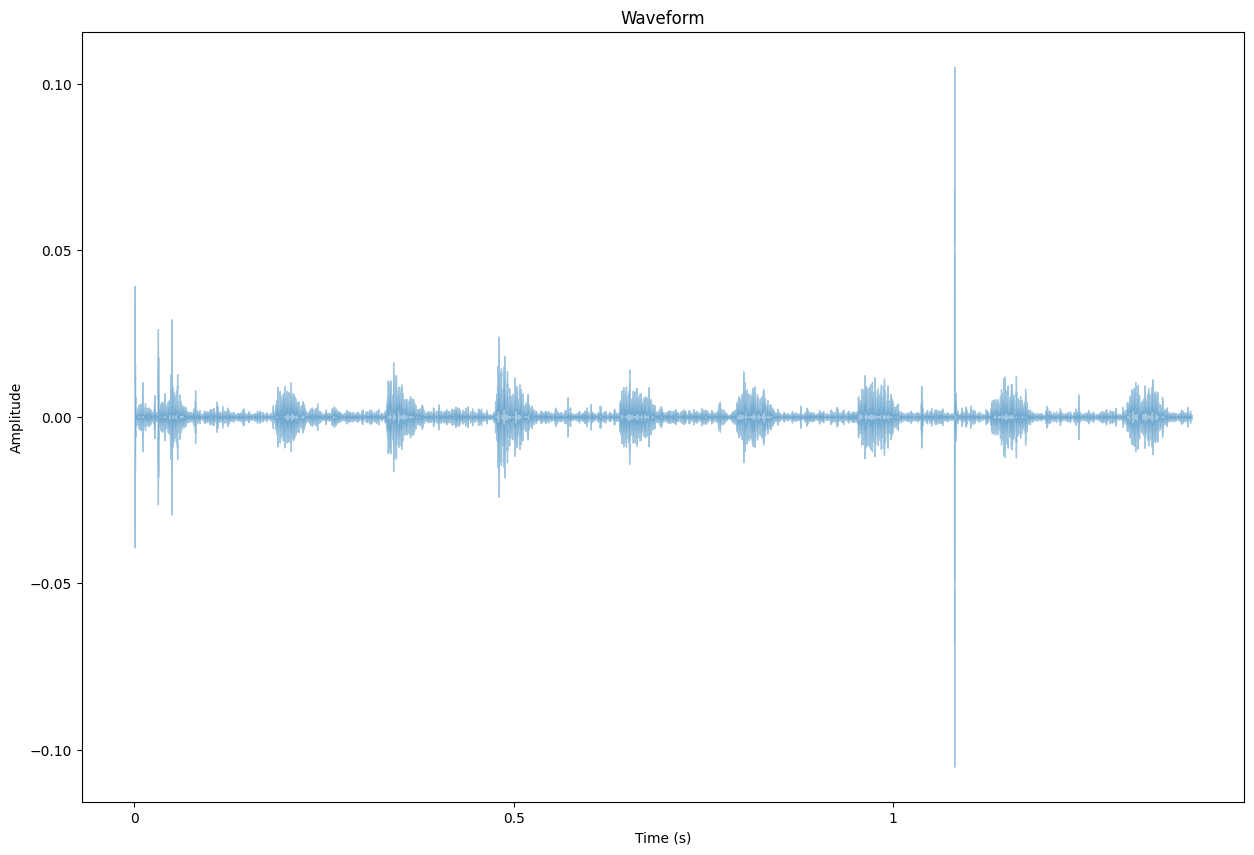

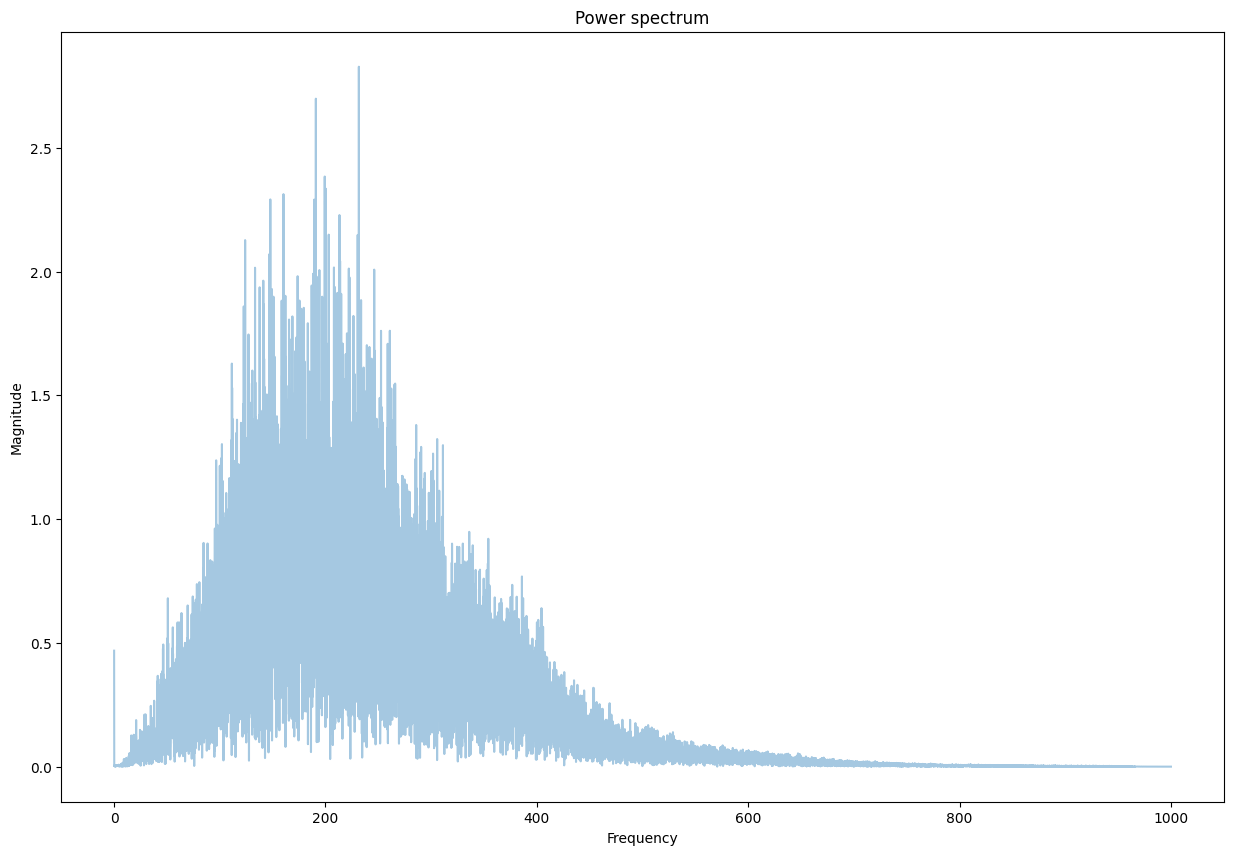

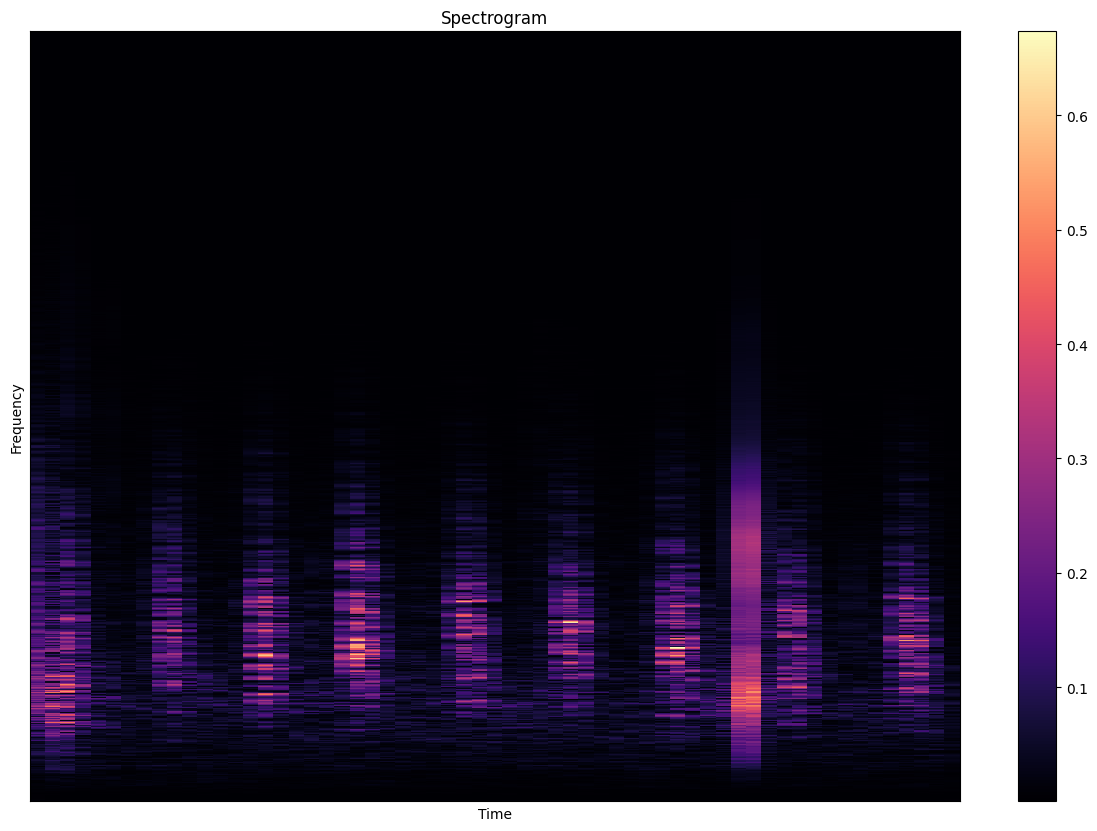

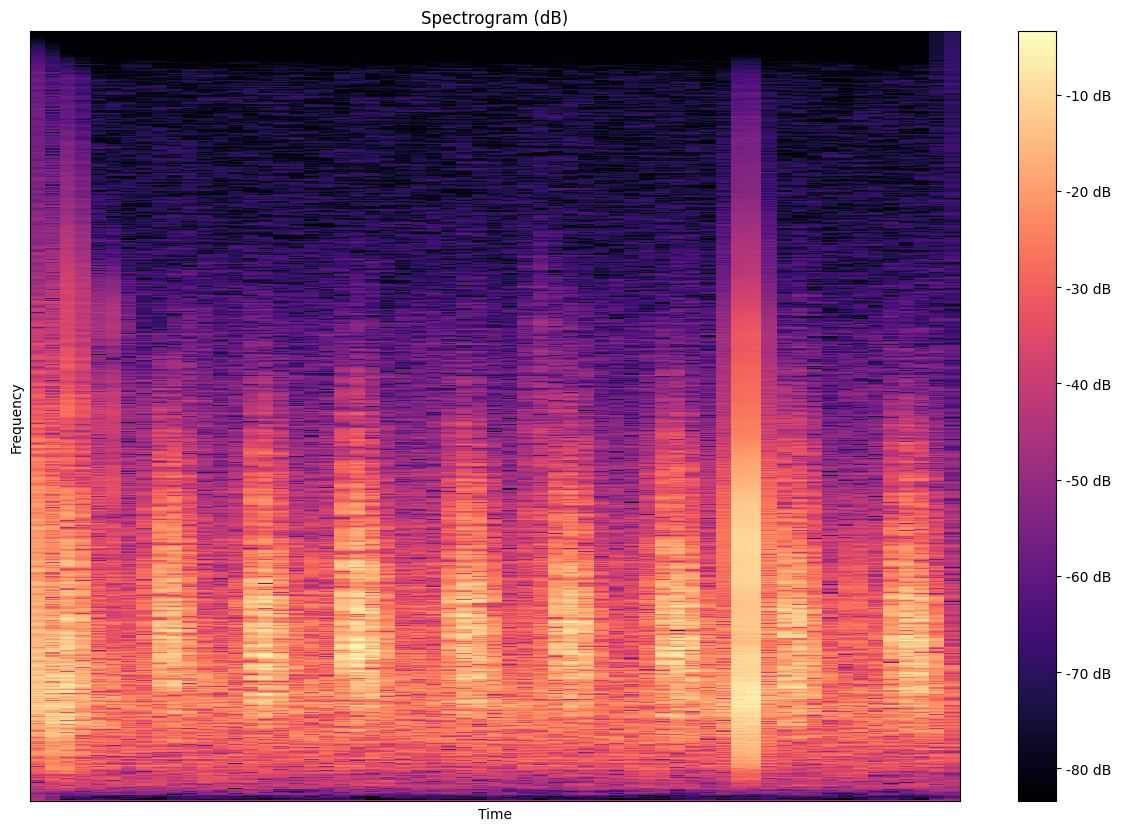

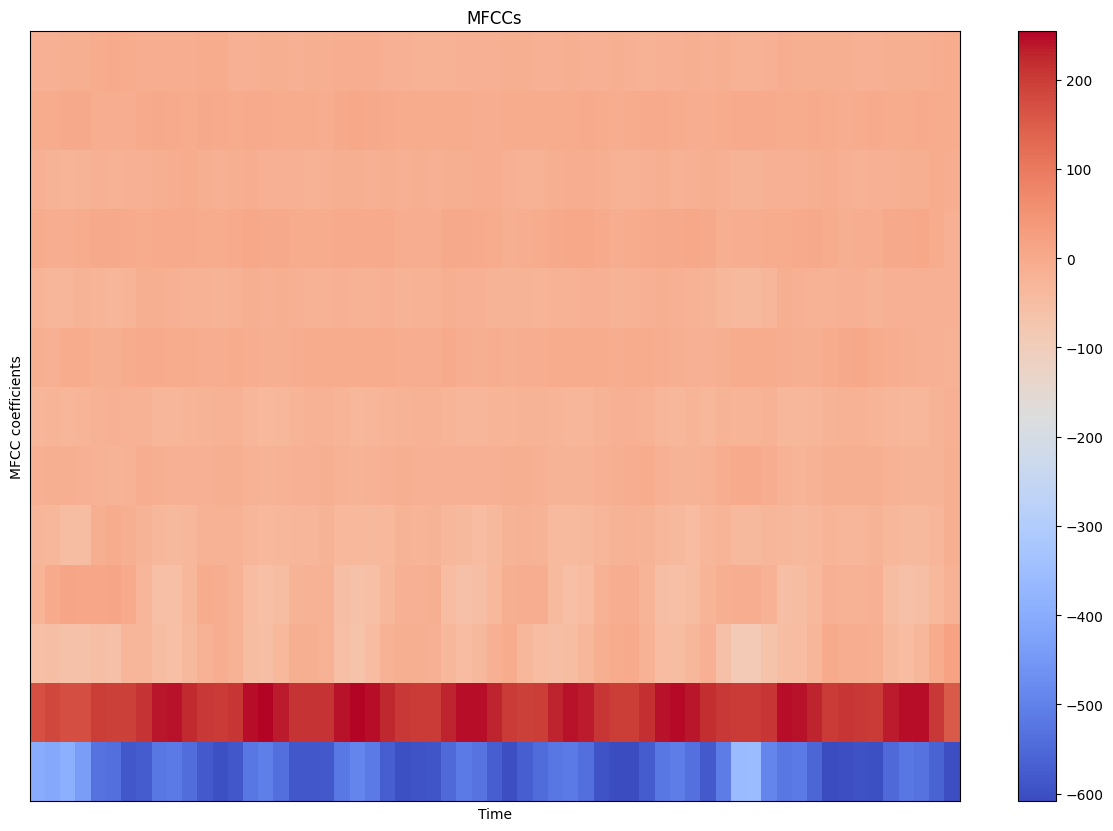

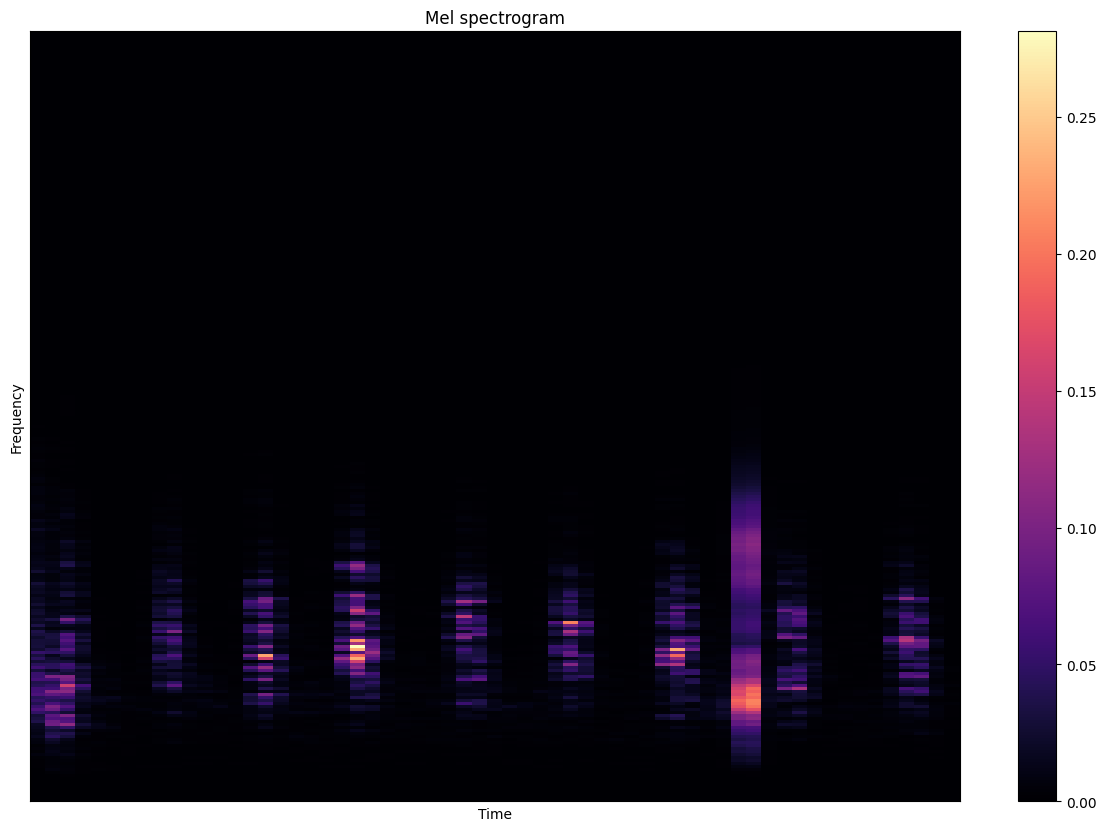

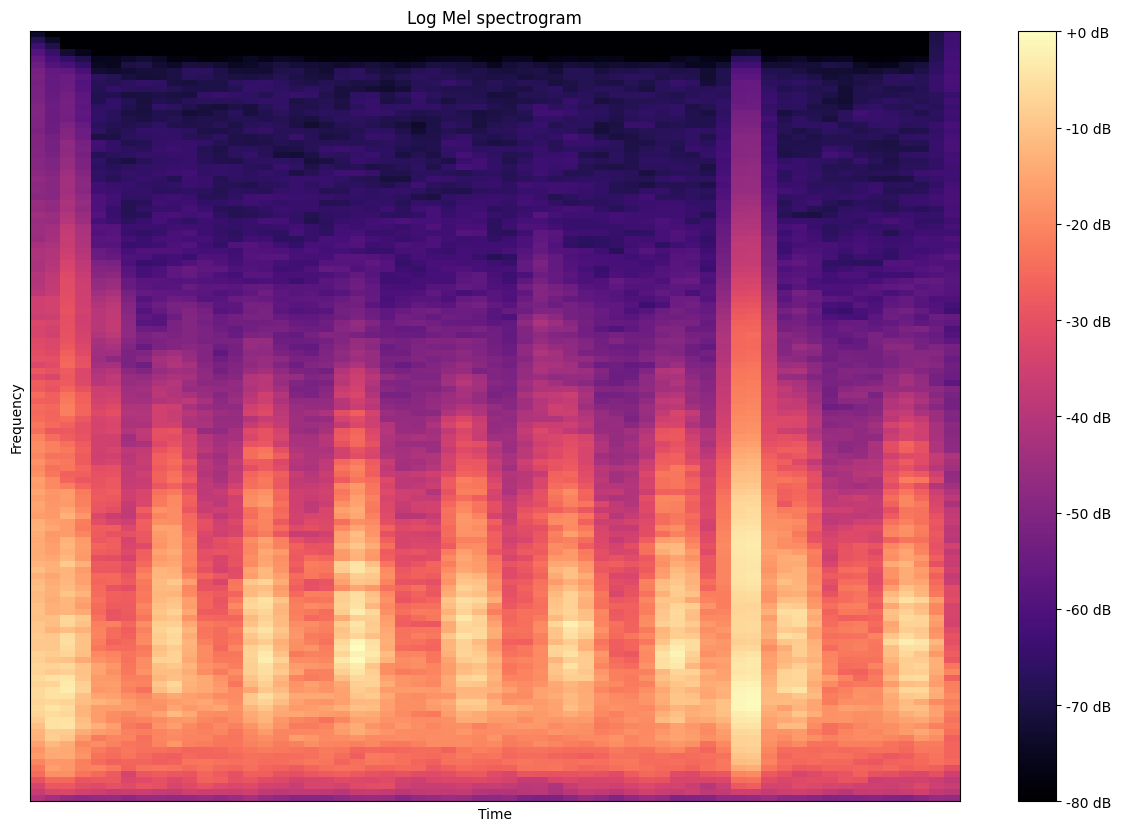

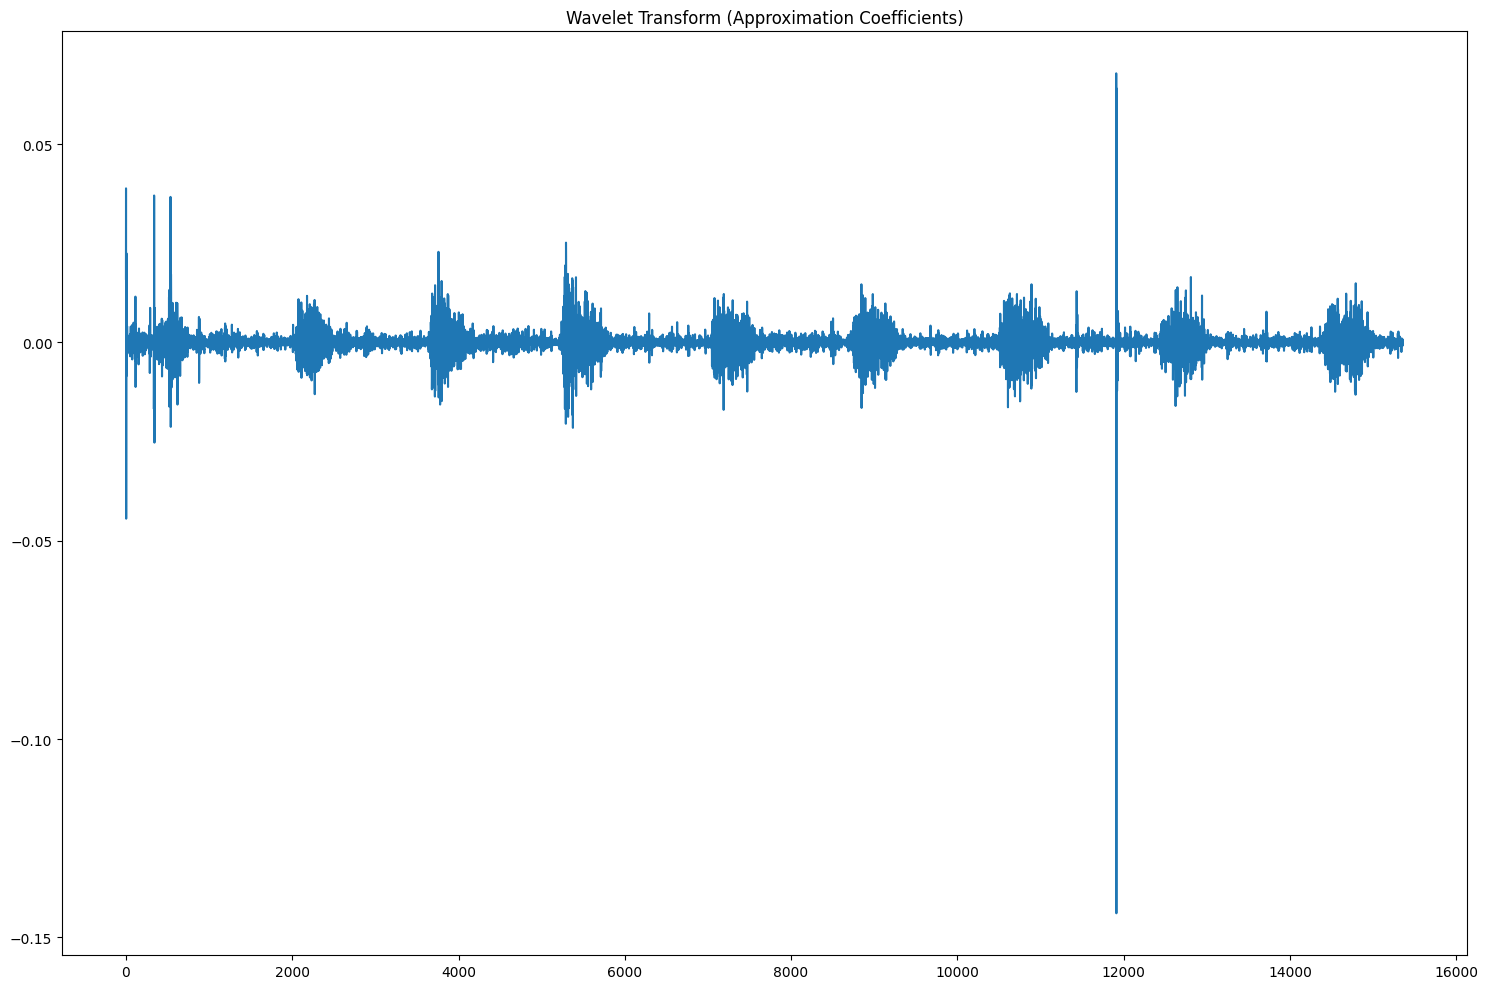

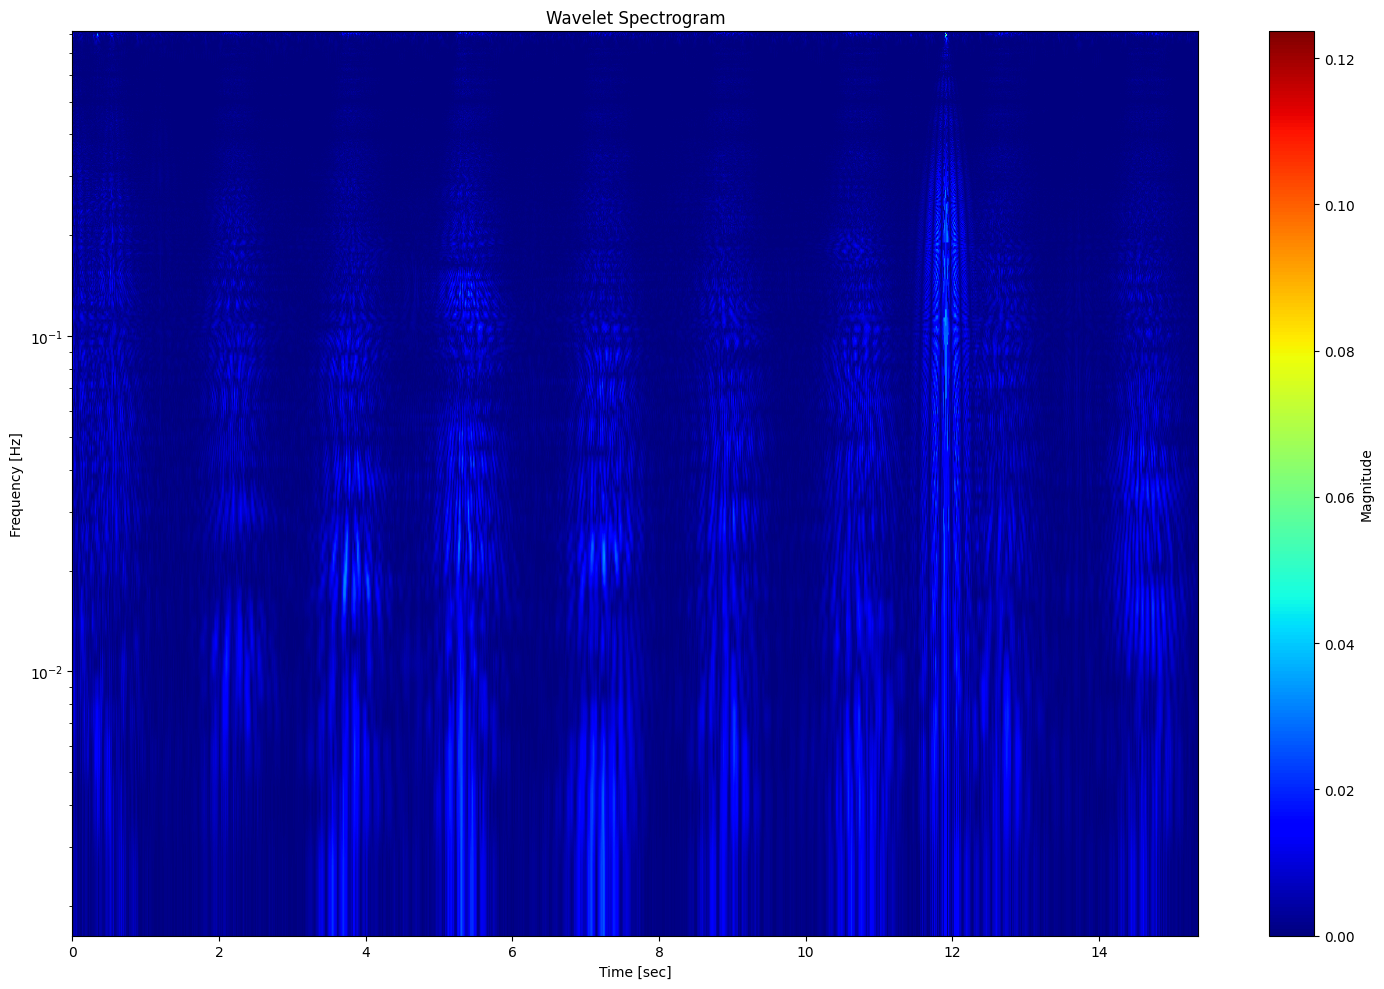

In [106]:
# -*- coding: utf-8 -*-
"""
Created on Sat Mar  2 22:29:52 2024

@author: Mayar
"""


FIG_SIZE = (15,10)

file = "/kaggle/input/sprsound-nosplit/SPRSound-main/example/65097128_5.6_1_p2_2491.wav"

# load audio file with Librosa
signal, sample_rate = librosa.load(file, sr=2000)

# WAVEFORM
# display waveform
plt.figure(figsize=FIG_SIZE)
librosa.display.waveshow(signal, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

# FFT -> power spectrum
# perform Fourier transform
fft = np.fft.fft(signal)

# calculate abs values on complex numbers to get magnitude
spectrum = np.abs(fft)

# create frequency variable
f = np.linspace(0, sample_rate, len(spectrum))

# take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

# plot spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft)

# display spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

# apply logarithm to cast amplitude to Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

# MFCCs
# extract 13 MFCCs
MFCCs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

# display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

# Mel Spectrogram
melspectrum = librosa.feature.melspectrogram(y=signal, sr=sample_rate, hop_length=hop_length, window='hann', n_mels=256)

# display Mel spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(melspectrum, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Mel spectrogram")

# Log Mel Spectrogram
ps = librosa.feature.melspectrogram(y=signal, sr=sample_rate)
ps_db = librosa.power_to_db(ps, ref=np.max)

plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(ps_db, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.title("Log Mel spectrogram")

# Wavelet Transform
cA, cD = pywt.dwt(signal, 'db1')

# Plot Wavelet Transform
plt.figure(figsize=FIG_SIZE)
plt.plot(cA)
plt.title('Wavelet Transform (Approximation Coefficients)')
plt.tight_layout()
plt.show()

# show plots
plt.show()


# Compute the Continuous Wavelet Transform (CWT)
scales = np.arange(1, 500)
[cwt, frequencies] = pywt.cwt(signal, scales, 'morl')

# Create a time vector
time = np.arange(0, len(signal)) / 2000

# Plot the wavelet spectrogram
plt.figure(figsize=FIG_SIZE)
plt.imshow(abs(cwt), aspect='auto', cmap='jet',extent=[time.min(), time.max(), frequencies.min(), frequencies.max()])
plt.colorbar(label='Magnitude')
plt.yscale('log')
plt.title('Wavelet Spectrogram')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.tight_layout()
plt.show()
